<a href="https://colab.research.google.com/github/saivenkatreddy29/TensorFlow-Learning/blob/main/Time_series_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv


--2024-08-13 19:31:17--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.04s   

2024-08-13 19:31:17 (4.50 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', index_col = 'Date', parse_dates=['Date'])

In [ ]:
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [ ]:
bitcoin_prices = df.rename( columns = {'Closing Price (USD)': 'Price'})['Price']

In [ ]:
bitcoin_prices

,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


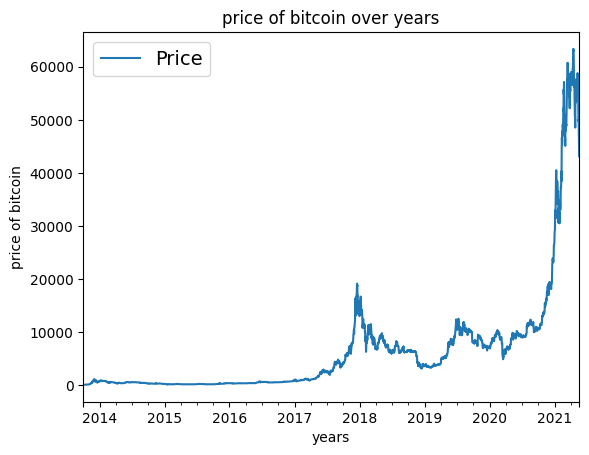

In [ ]:
bitcoin_prices.plot()
plt.ylabel('price of bitcoin')
plt.xlabel('years')
plt.title('price of bitcoin over years')
plt.legend(fontsize = 14)

In [ ]:
prices = []
year = []
import csv
from datetime import datetime
with open('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', 'r') as f:
  # print(f)
  reader = csv.reader(f)
  next(reader)
  for row in reader:
    year.append(datetime.strptime(row[1], "%Y-%m-%d"))
    prices.append(float(row[2]))




In [ ]:
year[:10], prices[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

Text(0.5, 1.0, 'price along years')

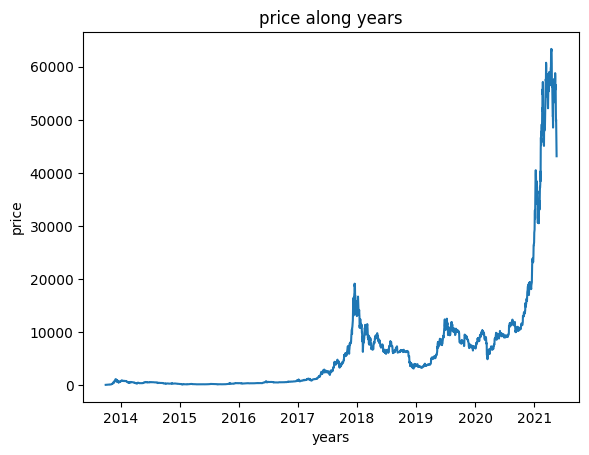

In [ ]:
plt.plot(year,prices)
plt.ylabel('price')
plt.xlabel('years')
plt.title('price along years')

In [ ]:
train_size = int(0.8 * len(year))

X_train = year[:train_size]
y_train = prices[:train_size]

X_test = year[train_size:]
y_test = prices[train_size:]

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

Text(0, 0.5, 'price')

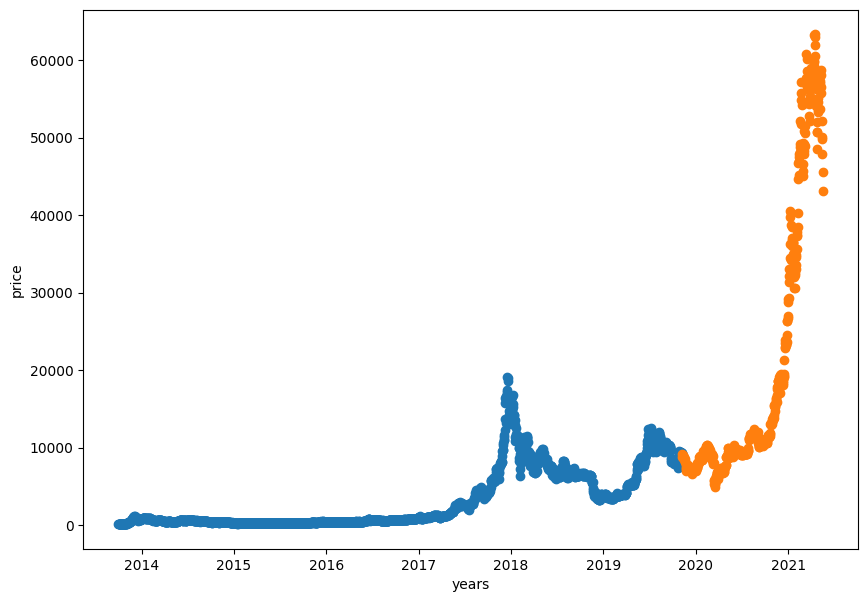

In [ ]:
plt.figure(figsize = (10,7))
plt.scatter(X_train,y_train)
plt.scatter(X_test,y_test)
plt.xlabel('years')
plt.ylabel('price')

In [ ]:
def plot_time_series(time, values, format = '.', start = 0, end = None, label = None):

  plt.plot(time[start:end], values[start:end], format,label = label)
  plt.xlabel('years')
  plt.ylabel('price')
  if label:
    plt.legend(fontsize = 14)
  plt.grid(True)

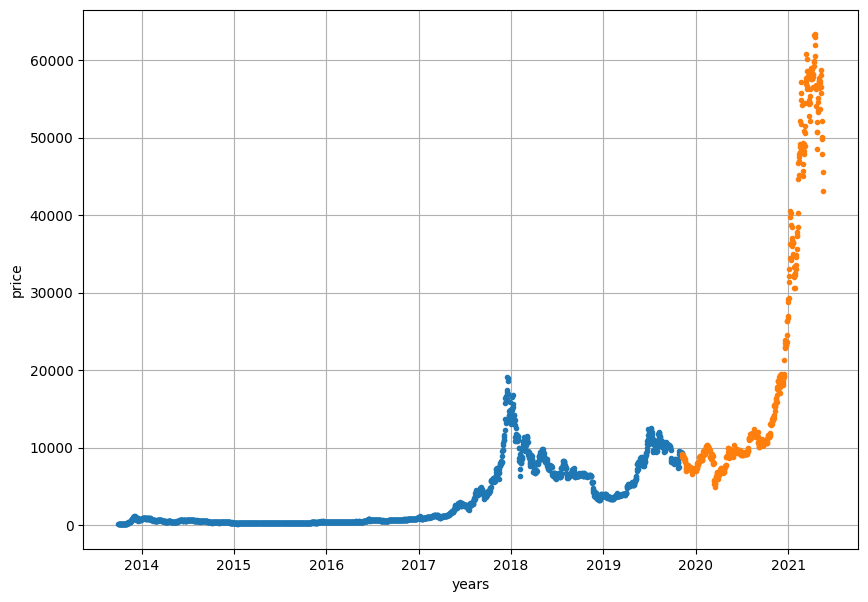

In [ ]:
plt.figure(figsize = (10,7))
plot_time_series(X_train, y_train)
plot_time_series(X_test,y_test)

# **Model experiments**

**Model 0 Naive Forecast**

In [ ]:
naive_forecast = y_test[:-1]
naive_forecast[:10], naive_forecast[-10:]

([9226.4858208826,
  8794.3586445233,
  8798.0420546256,
  9081.1868784913,
  8711.5343391679,
  8760.8927181435,
  8749.520591019,
  8656.970922354,
  8500.6435581622,
  8469.2608988992],
 [57107.1206718864,
  58788.2096789273,
  58102.1914262342,
  55715.5466512869,
  56573.5554719043,
  52147.8211869823,
  49764.1320815975,
  50032.6931367648,
  47885.6252547166,
  45604.6157536131])

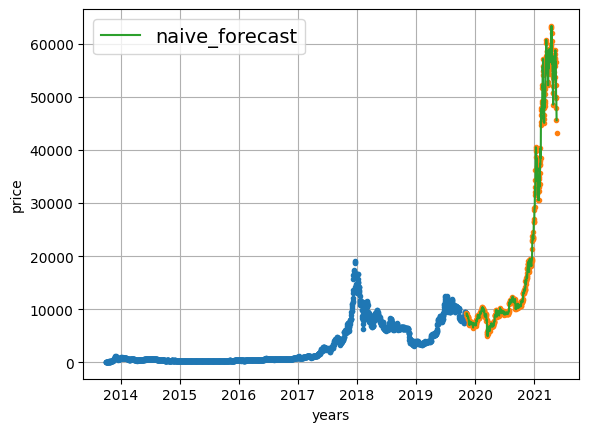

In [ ]:
plot_time_series(X_train,y_train)
plot_time_series(X_test,y_test,)
plot_time_series(X_test[1:], naive_forecast, format = '-', label = 'naive_forecast')

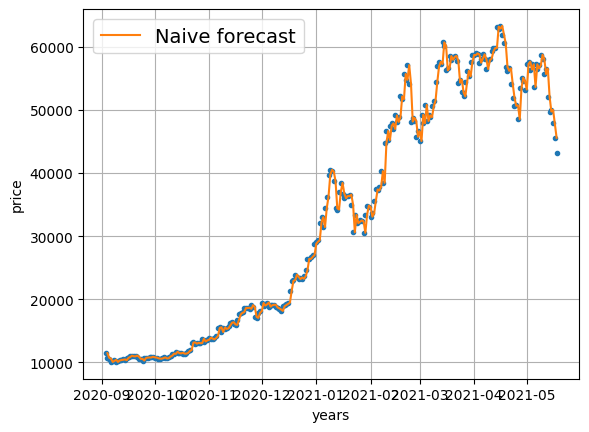

In [ ]:
# plot_time_series(X_train, y_train)
plot_time_series(X_test, y_test, start = 300)
offset = 300
plot_time_series(time=X_test[1:], values=naive_forecast, format="-", start=300, label="Naive forecast");

**Evaluating time series model**

In [ ]:
def mean_absolute_scaled_error(y_true, y_pred):

  mae = tf.reduce_mean(abs(y_true - y_pred))

  #mae of naive forecast
  naive_mae = tf.reduce_mean(abs(y_true[1:] - y_true[:-1]))

  return mae/naive_mae

In [ ]:
def evaluate_preds(y_true, y_pred):
  # print('entered')
  y_true = tf.cast(y_true, dtype = tf.float32)
  y_pred = tf.cast(y_pred, dtype = tf.float32)
  # print('crossed')

  mae_f = tf.keras.metrics.MeanAbsoluteError()
  mae_f.update_state(y_true, y_pred)
  mae = mae_f.result().numpy()

  #mase
  mase_f = tf.keras.metrics.MeanSquaredError()
  mase_f.update_state(y_true, y_pred)
  mse = mase_f.result().numpy()

  # mase
  mase = mean_absolute_scaled_error(y_true, y_pred).numpy()

  #rmse
  rmse_f = tf.keras.metrics.RootMeanSquaredError()
  rmse_f.update_state(y_true, y_pred)
  rmse = rmse_f.result().numpy()

  #mape
  mape_f = tf.keras.metrics.MeanAbsolutePercentageError()
  mape_f.update_state(y_true, y_pred)
  mape = mape_f.result().numpy()

  return ({
      'mae': mae,
      'mse': mse,
      'rmse': rmse,
      'mape': mape,
      'mase': mase
  })

In [ ]:
naive_results = evaluate_preds(y_test[1:], naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

# **Windowing Datasets**

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:


def get_labeled_windows(x, horizon = 1):

  return x[:,:-horizon], x[:,-horizon:]


In [ ]:
test_window, test_label = get_labeled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)

In [ ]:
test_window, test_label

(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[8]], dtype=int32)>)

In [ ]:
rices = np.arange(3000)

In [ ]:
rices.shape

(3000,)

In [ ]:
# Create function to view NumPy arrays as windows
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labeled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [ ]:
prices = np.array(prices)

In [ ]:
full_windows, full_labels = make_windows(prices, window_size = 7, horizon = 1)

In [ ]:
full_windows[:3]

array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  ],
       [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
        123.033  ],
       [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
        124.049  ]])

In [ ]:
full_labels[:3]

array([[123.033  ],
       [124.049  ],
       [125.96116]])

In [ ]:
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
for i in range (3):
  print(f"the window is {full_windows[i]} -->")
  print(full_labels[i])

the window is [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -->
[123.033]
the window is [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -->
[124.049]
the window is [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -->
[125.96116]


In [ ]:
# last 3 values
for i in range (3):
  print(f"the window is {full_windows[-i]} --> {full_labels[-i]}")

the window is [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] --> [123.033]
the window is [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] --> [43144.47129086]
the window is [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] --> [45604.61575361]


# **Turning into Training and Testing Datasets**

In [ ]:
def make_train_test_splits(windows, labels, test_size = 0.2):

  split = int((1-test_size) * len(windows))
  print(split)
  window_train, window_test = windows [:split], windows[split:]
  label_train, label_test = labels[:split], labels[split:]

  return window_train, window_test,label_train, label_test

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)

2224


In [ ]:
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [ ]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [ ]:
WINDOW_SIZE, HORIZON

(7, 1)

In [ ]:
len(y_train)

2229

In [ ]:
np.array_equal(y_train[WINDOW_SIZE:], np.squeeze(train_labels))

False

In [ ]:
np.array(y_train).shape

(2229,)

In [ ]:
np.squeeze(train_labels).shape

(2224,)

In [ ]:
np.array(y_train[7:])

array([ 123.033     ,  124.049     ,  125.96116   , ..., 9369.62808116,
       9326.59962378, 9335.75240233])

In [ ]:
np.squeeze(train_labels[:-2])

array([ 123.033     ,  124.049     ,  125.96116   , ..., 9369.62808116,
       9326.59962378, 9335.75240233])

# **Make a modeling Checkpoint**

In [ ]:
import os

In [ ]:
def create_model_checkpoint(model_name, savepath = 'model_experiments'):
  total_path = os.path.join(savepath, model_name + '.keras')
  print(total_path)

  back = tf.keras.callbacks.ModelCheckpoint(total_path,
                                     monitor='val_loss',
                                     verbose=1, save_best_only=True)
  return back

**Model1 Dense Model**

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers

In [ ]:
# Construct model
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation
], name="model_1_dense") # give the model a name so we can save it

model_1.compile(loss = 'mae',
                optimizer = tf.keras.optimizers.Adam()
               )

model_1.fit(train_windows,train_labels,
            epochs = 100, validation_data = (test_windows, test_labels),
            batch_size = 128,
            verbose = 1,
             callbacks = [create_model_checkpoint(model_name ='model_1_dense')]
            )

model_experiments/model_1_dense.keras
Epoch 1/100
17/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 391.3600
Epoch 1: val_loss improved from inf to 1129.25916, saving model to model_experiments/model_1_dense.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 379.0092 - val_loss: 1129.2592
Epoch 2/100
11/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 157.9414 
Epoch 2: val_loss improved from 1129.25916 to 721.46918, saving model to model_experiments/model_1_dense.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 153.7243 - val_loss: 721.4692
Epoch 3/100
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 132.1640
Epoch 3: val_loss did not improve from 721.46918
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 128.7434 - val_loss: 782.9761
Epoch 4/100
 1/18 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - loss: 142.1726
Epoch 4: val_loss improved from 721.46918 to 711.39691, saving model to model_experiments/model_1_dense.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 124.0959 - val_loss: 711.3969


In [ ]:
model_1.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 380.7195 


727.8057250976562

In [ ]:
model_1 = tf.keras.models.load_model('/content/model_experiments/model_1_dense.keras')

In [ ]:
model_1.evaluate(test_windows,test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 283.9296  


569.6220703125

In [ ]:
preds = model_1.predict(test_windows)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


# **Making forecasts on test data**

In [ ]:
def make_preds(model, input_data):

  preds = model.predict(input_data)
  preds = tf.squeeze(preds)
  return preds

In [ ]:
preds = make_preds(model_1, test_windows)
preds.shape

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


TensorShape([556])

In [ ]:
test_labels.shape

(556, 1)

In [ ]:
model1_results = evaluate_preds(tf.squeeze(test_labels), preds)
model1_results

{'mae': 569.62195,
 'mse': 1168762.6,
 'rmse': 1081.0933,
 'mape': 2.557478,
 'mase': 1.000668}

In [ ]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

In [ ]:
len(X_test), len(X_test[-len(test_windows):])

(558, 556)

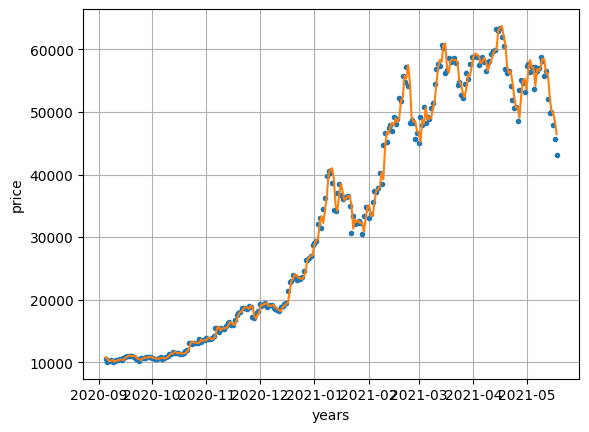

In [ ]:
offset = 300
plot_time_series(X_test[-len(test_windows):], test_labels, start = offset)
plot_time_series(X_test[-len(test_windows):], preds, format = '-', start = offset)

# **Dense model 2 window 30 and horizon 1**

In [ ]:
 full_windows, full_labels = make_windows(prices, window_size = 30, horizon = 1)

In [ ]:
full_windows[1].shape, full_labels[1]

((30,), array([198.04883]))

In [ ]:
train_windows,test_windows, train_labels,  test_labels =  make_train_test_splits(full_windows, full_labels)

2205


In [ ]:
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2205, 2205, 552, 552)

**model 2**

In [ ]:
model_2 = Sequential([
    layers.Dense(128, 'relu'),
    layers.Dense(HORIZON)
])

model_2.compile(loss = 'mae',
                optimizer = tf.keras.optimizers.Adam())

model_2.fit(train_windows,train_labels, epochs = 100, verbose = 0,
            batch_size = 128, validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name= 'model_2_dense')])

model_experiments/model_2_dense.keras

Epoch 1: val_loss improved from inf to 2178.78906, saving model to model_experiments/model_2_dense.keras

Epoch 2: val_loss improved from 2178.78906 to 1807.00903, saving model to model_experiments/model_2_dense.keras

Epoch 3: val_loss improved from 1807.00903 to 1792.75366, saving model to model_experiments/model_2_dense.keras

Epoch 4: val_loss improved from 1792.75366 to 1185.18884, saving model to model_experiments/model_2_dense.keras

Epoch 5: val_loss did not improve from 1185.18884

Epoch 6: val_loss did not improve from 1185.18884

Epoch 7: val_loss improved from 1185.18884 to 1058.73621, saving model to model_experiments/model_2_dense.keras

Epoch 8: val_loss improved from 1058.73621 to 933.89154, saving model to model_experiments/model_2_dense.keras

Epoch 9: val_loss did not improve from 933.89154

Epoch 10: val_loss improved from 933.89154 to 851.85223, saving model to model_experiments/model_2_dense.keras

Epoch 11: val_loss improved

In [ ]:
model_2.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 309.1595 


610.8814697265625

In [ ]:
model_2 = tf.keras.models.load_model('/content/model_experiments/model_2_dense.keras')

In [ ]:
model_2.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 307.9269  


603.8130493164062

In [ ]:
pred_2 = make_preds(model_2, test_windows)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
model_2_results = evaluate_preds(tf.squeeze(test_labels), pred_2)
model_2_results

{'mae': 603.81305,
 'mse': 1264737.4,
 'rmse': 1124.6055,
 'mape': 2.7522664,
 'mase': 1.0554711}

In [ ]:
len(X_test)

558

In [ ]:
len(test_windows), len(test_labels)

(552, 552)

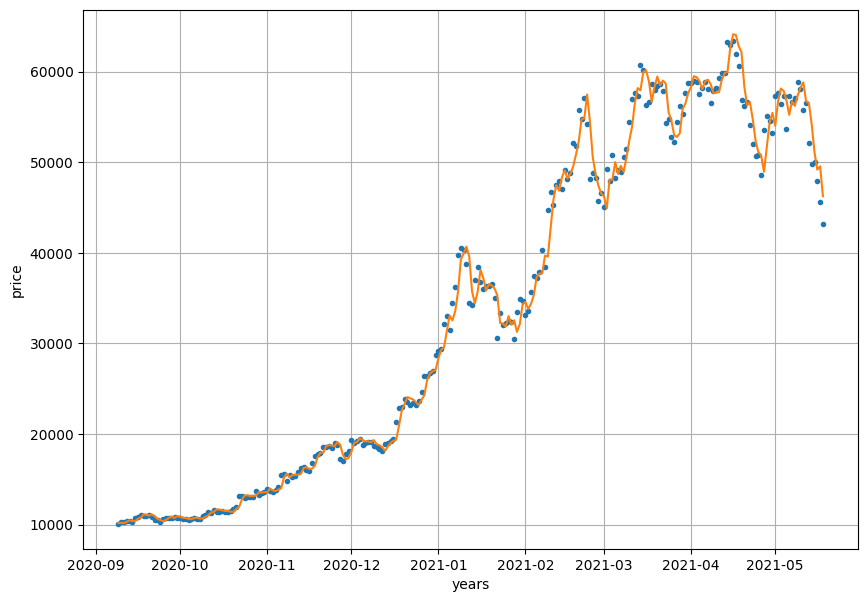

In [ ]:
plt.figure(figsize = (10,7))
plot_time_series(X_test[-len(test_windows):], test_labels, start = 300)
plot_time_series(X_test[-len(test_windows):], pred_2, start = 300, format = '-')

**model 3 Dense window 30 horizon 7**

In [ ]:
full_windows, full_labels = make_windows(prices, window_size = 30, horizon = 7)

In [ ]:
full_windows[0].shape, full_labels[0].shape

((30,), (7,))

In [ ]:
train_windows,test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)

2200


In [ ]:
len(train_windows), len(test_windows),len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [ ]:
model_3 = Sequential([
    layers.Dense(128, 'relu'),
    layers.Dense(7)
])

model_3.compile(loss = 'mae',
                optimizer = tf.keras.optimizers.Adam())

model_3.fit(train_windows, train_labels, epochs = 100, batch_size = 128,
            validation_data = (test_windows, test_labels),verbose = 0,
            callbacks = [create_model_checkpoint('model_3_dense')])

model_experiments/model_3_dense.keras

Epoch 1: val_loss improved from inf to 3040.38940, saving model to model_experiments/model_3_dense.keras

Epoch 2: val_loss improved from 3040.38940 to 2610.02856, saving model to model_experiments/model_3_dense.keras

Epoch 3: val_loss improved from 2610.02856 to 2189.17993, saving model to model_experiments/model_3_dense.keras

Epoch 4: val_loss improved from 2189.17993 to 1822.45593, saving model to model_experiments/model_3_dense.keras

Epoch 5: val_loss improved from 1822.45593 to 1674.67334, saving model to model_experiments/model_3_dense.keras

Epoch 6: val_loss did not improve from 1674.67334

Epoch 7: val_loss improved from 1674.67334 to 1649.66174, saving model to model_experiments/model_3_dense.keras

Epoch 8: val_loss did not improve from 1649.66174

Epoch 9: val_loss improved from 1649.66174 to 1590.13843, saving model to model_experiments/model_3_dense.keras

Epoch 10: val_loss improved from 1590.13843 to 1589.75403, saving model to 

In [ ]:
model_3.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 628.5337 


1253.34912109375

In [ ]:
model_3 = tf.keras.models.load_model("/content/model_experiments/model_3_dense.keras")

In [ ]:
model_3.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 627.2616 


1223.541015625

In [ ]:
model_3_preds = make_preds(model_3,test_windows)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [ ]:
model_3_preds.shape

TensorShape([551, 7])

In [ ]:
tf.squeeze(test_labels).shape

TensorShape([551, 7])

In [ ]:
model_3_results = evaluate_preds(tf.squeeze(test_labels), model_3_preds)
model_3_results

{'mae': 1223.541,
 'mse': 5409584.0,
 'rmse': 2325.8513,
 'mape': 5.575258,
 'mase': 2.1772227}

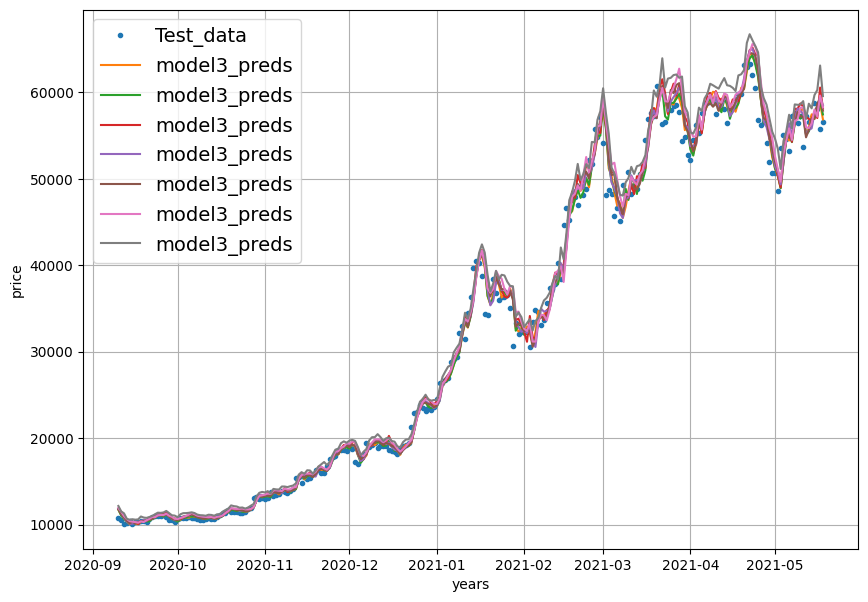

In [ ]:
k = 300
plt.figure(figsize=(10,7))
plot_time_series(X_test[-len(test_windows):], test_labels[:,0], start = 300, label = 'Test_data')
plot_time_series(X_test[-len(test_labels):], model_3_preds, start = k, format = '-', label = 'model3_preds')

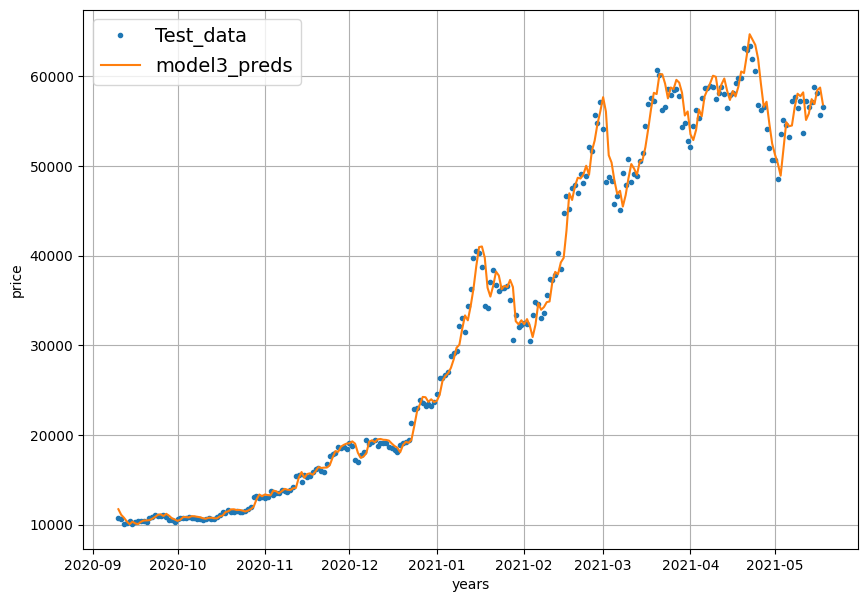

In [ ]:
k = 300
plt.figure(figsize=(10,7))
plot_time_series(X_test[-len(test_windows):], test_labels[:,0], start = 300, label = 'Test_data')
plot_time_series(X_test[-len(test_labels):], model_3_preds[:,0], start = k, format = '-', label = 'model3_preds')

In [ ]:
model1_results['mae']

569.62195

In [ ]:
model_maes = {
    'naive': naive_results['mae'],
    'm1': model1_results['mae'],
    'm2': model_2_results['mae'],
    'm3': model_3_results['mae']
}

In [ ]:
results = pd.DataFrame([model_maes],index=['mae'])


In [ ]:
results

,naive,m1,m2,m3
mae,567.980225,569.621948,603.813049,1223.541016


<Axes: >

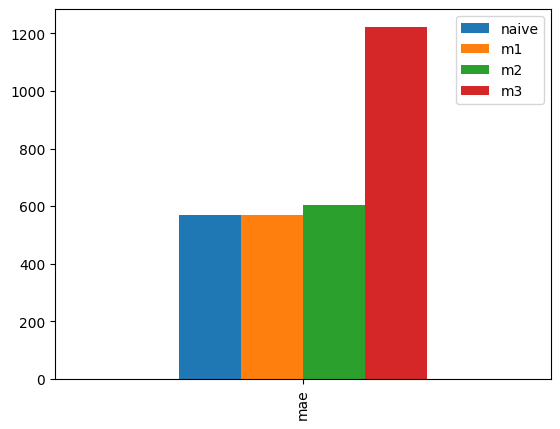

In [ ]:
results.plot(kind = 'bar')